In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import matplotlib.pyplot as plt
print("lib imported")

lib imported


In [10]:
image = plt.imread("/kaggle/input/data/images_001/images/00000001_000.png")
image.shape

(1024, 1024)

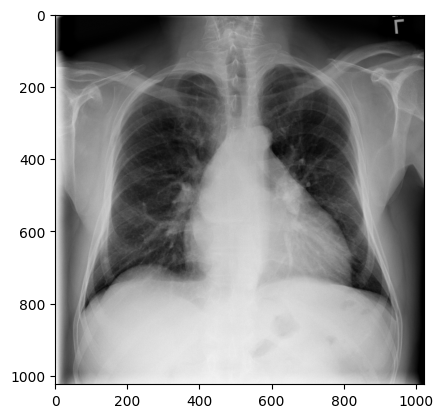

In [11]:
plt.imshow(image,cmap="gray")

In [12]:
data_label = pd.read_csv("/kaggle/input/data/Data_Entry_2017.csv")
data_label

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [26]:
print(data_label[["Image Index","Finding Labels","Patient ID"]].head)

<bound method NDFrame.head of              Image Index          Finding Labels  Patient ID
0       00000001_000.png            Cardiomegaly           1
1       00000001_001.png  Cardiomegaly|Emphysema           1
2       00000001_002.png   Cardiomegaly|Effusion           1
3       00000002_000.png              No Finding           2
4       00000003_000.png                  Hernia           3
...                  ...                     ...         ...
112115  00030801_001.png          Mass|Pneumonia       30801
112116  00030802_000.png              No Finding       30802
112117  00030803_000.png              No Finding       30803
112118  00030804_000.png              No Finding       30804
112119  00030805_000.png              No Finding       30805

[112120 rows x 3 columns]>


# Data Pre Processing 

As we can see the finding label has more than one dieseas seprated by `|` 

so lets seperate it through One - Hot Encoding using 

In [27]:
# List of all 14 diseases
all_labels = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 
              'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 
              'Fibrosis', 'Pleural_Thickening', 'Hernia','No Finding']

# One-hot encode the labels
for label in all_labels:
    data_label[label] = data_label['Finding Labels'].map(lambda x: 1 if label in x else 0)

In [28]:
data_label 

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,1,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0,1,0,0,0,0,0,0,0,0
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,1
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,1
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,1


lets visulize the class imbalances among all the class since it is multilabel classification 

In [29]:
import seaborn as sns 


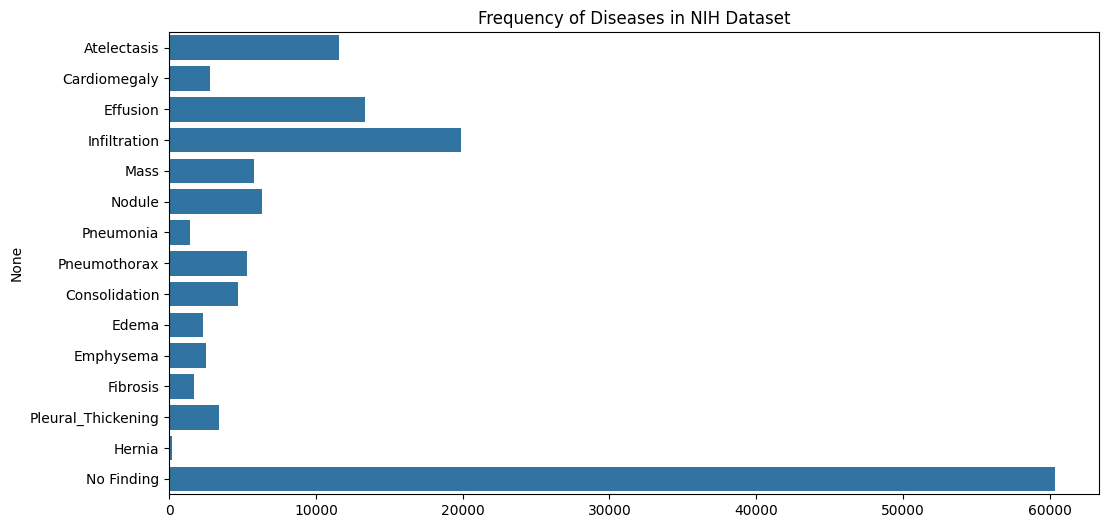

In [30]:
# Plot the distribution
# Plot the distribution
label_counts = data_label[all_labels].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.values, y=label_counts.index)
plt.title('Frequency of Diseases in NIH Dataset')
plt.show()

In [31]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
 12  Atelectasis                  112120 non-null  int64  
 13 

In [32]:
data_label.value_counts(["Unnamed: 11"])

Series([], Name: count, dtype: int64)

In [33]:
del data_label["Unnamed: 11"]

In [34]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Atelectasis                  112120 non-null  int64  
 12  Cardiomegaly                 112120 non-null  int64  
 13 

In [35]:
data_label["No Finding"].value_counts()

No Finding
1    60361
0    51759
Name: count, dtype: int64

`No Finding` means the image have no dicease means our data set have an about 60361 clean image  51759 image  is infected ones   

In [36]:
import os
from glob import glob

# Define the root path where your image folders are located
# On Kaggle, it's usually: /kaggle/input/data/
image_root_path = '/kaggle/input/data/' 

# This finds all PNGs in any subfolder under the root
all_image_paths = {os.path.basename(x): x for x in glob(os.path.join(image_root_path, 'images*', 'images', '*.png'))}

print(f"Total images found: {len(all_image_paths)}")

Total images found: 112120


In [37]:
# Create the path column
data_label['path to images'] = data_label['Image Index'].map(all_image_paths.get)

# Quick check to see if any paths are missing
missing_count = data_label['path to images'].isnull().sum()
if missing_count == 0:
    print("All images mapped successfully!")
else:
    print(f"Warning: {missing_count} images could not be found.")

All images mapped successfully!


In [38]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Atelectasis                  112120 non-null  int64  
 12  Cardiomegaly                 112120 non-null  int64  
 13 

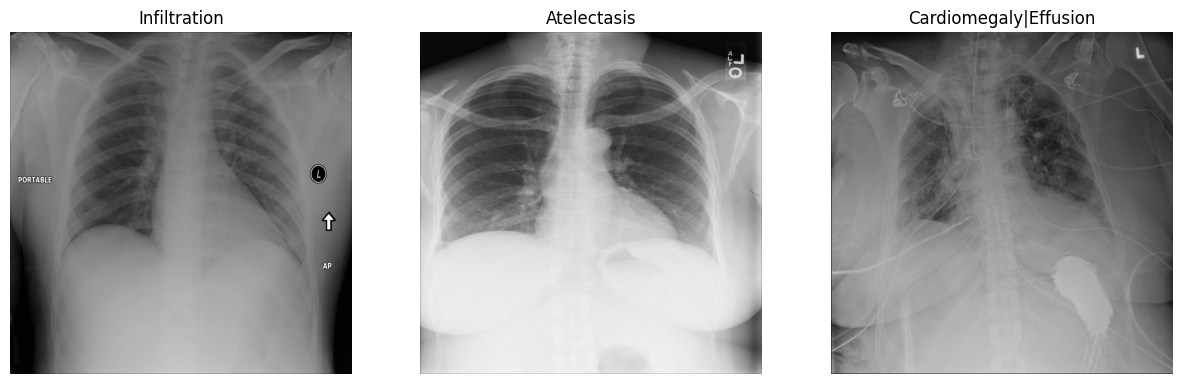

In [39]:
import matplotlib.pyplot as plt
import cv2

# Plot 3 sample images
plt.figure(figsize=(15, 5))
samples = data_label[data_label['Finding Labels'] != 'No Finding'].sample(3)

for i, (idx, row) in enumerate(samples.iterrows()):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(row['path to images'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(row['Finding Labels'])
    plt.axis('off')
plt.show()

In [40]:
data_label["Patient ID"].nunique()

30805

there are 30805 different patient in the dataset 

In [41]:
from sklearn.model_selection import GroupShuffleSplit

# 1. Initialize the splitter for the first split (80% Train, 20% Temp)
splitter = GroupShuffleSplit(test_size=0.20, n_splits=1, random_state=42)

# 2. Perform the split
# Notice we pass 'groups=df['Patient ID']' - this is the magic sauce
split = splitter.split(data_label, groups=data_label['Patient ID'])
train_inds, temp_inds = next(split)

# 3. Create the dataframes
train_df = data_label.iloc[train_inds]
temp_df = data_label.iloc[temp_inds]

In [42]:
train_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding,path to images
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,/kaggle/input/data/images_001/images/00000001_...
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,1,0,0,0,0,/kaggle/input/data/images_001/images/00000001_...
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,/kaggle/input/data/images_001/images/00000001_...
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_001/images/00000002_...
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,0,0,0,0,0,1,0,/kaggle/input/data/images_001/images/00000003_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112114,00030801_000.png,No Finding,0,30801,39,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030801_...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,1,0,0,0,0,0,0,0,0,/kaggle/input/data/images_012/images/00030801_...
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030802_...
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030804_...


In [43]:
# 1. Initialize the splitter for the second split (50% of 20% = 10% total)
splitter_val = GroupShuffleSplit(test_size=0.50, n_splits=1, random_state=42)

# 2. Perform the split on the TEMP dataframe
split_val = splitter_val.split(temp_df, groups=temp_df['Patient ID'])
val_inds, test_inds = next(split_val)

# 3. Create the final dataframes
val_df = temp_df.iloc[val_inds]
test_df = temp_df.iloc[test_inds]

print(f"Train Size: {len(train_df)} images")
print(f"Val Size:   {len(val_df)} images")
print(f"Test Size:  {len(test_df)} images")

Train Size: 89826 images
Val Size:   11679 images
Test Size:  10615 images


In [44]:
# Get the unique Patient IDs from each set
train_patients = set(train_df['Patient ID'])
val_patients = set(val_df['Patient ID'])
test_patients = set(test_df['Patient ID'])

# Check for overlaps
print(f"Leakage Train-Val: {len(train_patients.intersection(val_patients))}")
print(f"Leakage Train-Test: {len(train_patients.intersection(test_patients))}")
print(f"Leakage Val-Test:   {len(val_patients.intersection(test_patients))}")

# Assert prevents the code from continuing if there is an error
assert len(train_patients.intersection(val_patients)) == 0
assert len(train_patients.intersection(test_patients)) == 0
assert len(val_patients.intersection(test_patients)) == 0

print("✅ SUCCESS: No Data Leakage detected!")

Leakage Train-Val: 0
Leakage Train-Test: 0
Leakage Val-Test:   0
✅ SUCCESS: No Data Leakage detected!


In [45]:
train_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding,path to images
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,/kaggle/input/data/images_001/images/00000001_...
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,1,0,0,0,0,/kaggle/input/data/images_001/images/00000001_...
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,/kaggle/input/data/images_001/images/00000001_...
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_001/images/00000002_...
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,0,0,0,0,0,1,0,/kaggle/input/data/images_001/images/00000003_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112114,00030801_000.png,No Finding,0,30801,39,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030801_...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,1,0,0,0,0,0,0,0,0,/kaggle/input/data/images_012/images/00030801_...
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030802_...
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030804_...


In [46]:
test_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding,path to images
22,00000007_000.png,No Finding,0,7,82,M,PA,2500,2048,0.168000,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_001/images/00000007_...
216,00000044_000.png,Consolidation|Effusion|Infiltration,0,44,79,M,PA,2010,2021,0.194311,...,0,0,1,0,0,0,0,0,0,/kaggle/input/data/images_001/images/00000044_...
217,00000044_001.png,Infiltration|Pleural_Thickening,1,44,78,M,PA,2544,3056,0.139000,...,0,0,0,0,0,0,1,0,0,/kaggle/input/data/images_001/images/00000044_...
218,00000044_002.png,Cardiomegaly,2,44,78,M,PA,3056,2544,0.139000,...,0,0,0,0,0,0,0,0,0,/kaggle/input/data/images_001/images/00000044_...
240,00000053_000.png,Fibrosis|Infiltration|Nodule,0,53,71,M,PA,2992,2991,0.143000,...,0,0,0,0,0,1,0,0,0,/kaggle/input/data/images_001/images/00000053_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112100,00030789_000.png,Infiltration,0,30789,52,F,PA,2021,2021,0.194311,...,0,0,0,0,0,0,0,0,0,/kaggle/input/data/images_012/images/00030789_...
112101,00030790_000.png,No Finding,0,30790,47,F,PA,2021,2021,0.194311,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030790_...
112104,00030792_000.png,No Finding,0,30792,10,F,PA,1775,1712,0.194311,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030792_...
112105,00030792_001.png,No Finding,1,30792,10,F,PA,1663,1675,0.194311,...,0,0,0,0,0,0,0,0,1,/kaggle/input/data/images_012/images/00030792_...


In [47]:
import torch
from torch.utils.data import DataLoader , Dataset
import numpy as np 
from PIL import Image
import torchvision.transforms as transforms 

class ChestXrayDataset(Dataset):
    def __init__(self,dataframe,transform = None):
        self.dataframe = dataframe
        self.transform = transform
        
        self.all_labels = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 
                           'Nodule', 'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 
                           'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']
    def __len__(self):
        # Tells the model how many total images are in this set
        return len(self.dataframe)

    def __getitem__(self, idx):
        # 1. Get the row for the specific index
        row = self.dataframe.iloc[idx]
        
        # 2. Get the image path and load it
        img_path = row['path to images']
        image = Image.open(img_path).convert('RGB') # Ensure it's 3-channel RGB
        
        # 3. Get the labels as a numpy array (vector of 0s and 1s)
        labels = torch.tensor(row[self.all_labels].values.astype(np.float32))
        
        # 4. Apply transformations (Resize, Augment, Normalize)
        if self.transform:
            image = self.transform(image)
            
        return image, labels

In [48]:
# ImageNet statistics (standard for Transfer Learning)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# Training: Add randomness to prevent overfitting
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),      # Flip left-right (allowed)
    transforms.RandomRotation(10),          # Rotate +/- 10 degrees
    transforms.ToTensor(),                  # Convert to 0-1 Tensor
    normalize                               # Subtract mean, divide std
])

# Validation/Test: No randomness, just resize and normalize
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

create the dataLoader for the data pipeline

In [49]:
import os
NUM_WORKERS = os.cpu_count()
train_dataset = ChestXrayDataset(train_df, transform = train_transform)
test_dataset =  ChestXrayDataset(test_df, transform = val_transform)
val_dataset = ChestXrayDataset(val_df, transform = val_transform)

# create the dataloader for the dataset 
train_loader = DataLoader(train_dataset,batch_size = 32 , shuffle=True,num_workers = NUM_WORKERS)
test_loader = DataLoader(test_dataset,batch_size = 32, shuffle=False,num_workers = NUM_WORKERS)
val_loader = DataLoader(val_dataset,batch_size =  32 , shuffle=False,num_workers = NUM_WORKERS)

In [ ]:
# Grab one batch
images, labels = next(iter(train_loader))

print(f"Image Batch Shape: {images.shape}") 
# Should be [32, 3, 224, 224] -> 32 images, 3 channels (RGB), 224x224 pixels

print(f"Label Batch Shape: {labels.shape}") 
# Should be [32, 14] -> 32 images, 14 disease labels each

print("✅ Data Pipeline is ready!")

# Train the Model 

lets use the pre trained model `densenet121` model for our multi label classification , using technique called transfer Learning  

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torchinfo import summary

# 1. Define Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Instantiate Model
# Using densenet161 
model = models.densenet121(weights='IMAGENET1K_V1')

In [ ]:
# 3. Modify the Head
num_features = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 14),
    nn.Sigmoid()
)

# 4. Move to GPU
model = model.to(device)

In [ ]:

# Get one batch
images, labels = next(iter(train_loader))
images = images.to(device)

# Run model
with torch.no_grad():
    outputs = model(images)
    preds = torch.sigmoid(outputs)

# Print the first image's results
print("--- DEBUGGING ---")
print(f"Ground Truth (First Image): {labels[0].cpu().numpy()}")
print(f"Raw Prediction (First Image): {preds[0].cpu().numpy()}")
print(f"Max Value in Input Image: {images.max().item()}") # Should be roughly 2.0-3.0 (normalized), NOT 255.

In [ ]:
# 5. Now run summary
summary(model=model, 
        input_size=(32, 3, 224, 224), # (Batch_Size, Channels, Height, Width)
        col_names=["input_size", "output_size", "num_params", "trainable"])

### defining the Loss function and an Optimizer 

In [ ]:
# define loss function and optimizer
loss_fun = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
# calculate the accuracy of the model 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [ ]:
import torch
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch."""
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        # 1. Turn raw outputs (logits) into independent probabilities (0 to 1)
        y_pred_probs = y_pred

        # 2. Convert probabilities to binary predictions (0 or 1) based on 50% threshold
        y_pred_binary = (y_pred_probs > 0.5).float()

        # 3. Compare with the ground truth labels
        train_acc += (y_pred_binary == y).sum().item() / (y.size(0) * y.size(1))

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch."""
    # 1. Put model in evaluation mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # 2. Turn on inference context manager (saves memory)
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            
            # 3. Calculate and accumulate accuracy
            y_pred_probs = y_pred
            y_pred_binary = (y_pred_probs > 0.5).float()
            test_acc += (y_pred_binary == y).sum().item() / (y.size(0) * y.size(1))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model."""
    # Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        
        # Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [ ]:
# train the model
torch.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

results = train(model=model,
                train_dataloader=train_loader,
                test_dataloader=test_loader,
                optimizer=optimizer,
                loss_fn=loss_fun,
                epochs=15,
                device=device)
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


In [ ]:
device

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [2]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# 1. SETUP DEVICE (Fixes "Attempting to deserialize on CUDA..." error)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Running on: {device}")

# 2. INITIALIZE MODEL
# Ensure you use the same version as training (densenet121, 169, or 201)
model = models.densenet121(pretrained=False)

# 3. FIX THE CLASSIFIER STRUCTURE (Fixes "Unexpected key classifier.0.weight")
# We wrap the layer in nn.Sequential to match the saved file's structure.
num_ftrs = model.classifier.in_features
num_classes = 14 # <--- UPDATE THIS if you have more than 2 classes

model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, num_classes)
)

# 4. LOAD WEIGHTS SAFELY
model_path = '/kaggle/input/models/harshprajapati83/my-model/pytorch/default/1/model_weights.pth' # <--- UPDATE PATH

# map_location=device ensures it loads on CPU if GPU is missing
state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(state_dict)

# 5. PREPARE FOR INFERENCE
model = model.to(device)
model.eval()
print("Success: Model loaded!")

# -------------------------------------------------
# PREDICTION FUNCTION
# -------------------------------------------------
def predict(image_path):
    # Transforms must match what you used during training
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted = torch.max(outputs, 1)
        
    return predicted.item()

# Example usage:
print(predict('/kaggle/input/datasets/tolgadincer/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-1008087-0001.jpeg'))

Running on: cuda
Success: Model loaded!
3


In [5]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
from typing import List, Tuple

# ---------------------------------------------------------
# 1. SETUP DEVICE & MODEL (The Fixes)
# ---------------------------------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Running on: {device}")

# Define Model Architecture
model = models.densenet121(weights=None) # weights=None because we load our own

# FIX: Wrap classifier in nn.Sequential to match saved keys ("classifier.0.weight")
num_ftrs = model.classifier.in_features
num_classes = 14  # <--- CHANGE TO YOUR NUMBER OF CLASSES
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, num_classes)
)

# Load Weights (Safe for CPU/GPU)
model_path = '/kaggle/input/models/harshprajapati83/my-model/pytorch/default/1/model_weights.pth' # <--- UPDATE PATH
try:
    state_dict = torch.load(model_path, map_location=device)
    model.load_state_dict(state_dict)
    print("Model weights loaded successfully.")
except Exception as e:
    print(f"Error loading weights: {e}")

# Move to device
model = model.to(device)

# ---------------------------------------------------------
# 2. YOUR PREDICTION FUNCTION
# ---------------------------------------------------------
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device = device):

    # 1. Open image and convert to RGB
    img = Image.open(image_path).convert('RGB')

    # 2. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        # Default transform (Ensure this matches your training!)
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            # Common ImageNet normalization (adjust if you didn't use this in training)
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 3. Make sure the model is on the target device
    model.to(device)

    # 4. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # 5. Transform and add an extra dimension to image (Batch dimension)
        transformed_image = image_transform(img).unsqueeze(dim=0)

        # 6. Make a prediction on image with an extra dimension
        # Move the input tensor to the same device as the model
        target_image_pred = model(transformed_image.to(device))

    # 7. Convert logits -> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 8. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 9. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img) # Show original image
    
    pred_label = class_names[target_image_pred_label]
    pred_prob = target_image_pred_probs.max()
    
    plt.title(f"Pred: {pred_label} | Prob:{pred_prob:.3f}")
    plt.axis(False)
    plt.show() # Explicitly show the plot

# ---------------------------------------------------------
# 3. EXAMPLE USAGE
# ---------------------------------------------------------

Running on: cuda
Model weights loaded successfully.


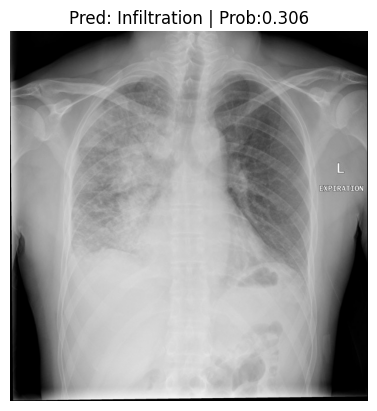

In [24]:
# Define your class names (Must be in the same order as training indices 0, 1, etc.)
class_names = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 
                           'Nodule', 'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 
                           'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia'] 

# Call the function
pred_and_plot_image(model=model, 
                     image_path="/kaggle/input/custom/pneumonia4.jpeg", 
                     class_names=class_names)

In [50]:
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np

# 1. Get all predictions and truths from the validation set
all_preds = []
all_targets = []
model.eval()
with torch.no_grad():
    for X, y in val_loader:
        X, y = X.to(device), y.to(device)
        preds = torch.sigmoid(model(X))
        all_preds.append(preds.cpu().numpy())
        all_targets.append(y.cpu().numpy())

all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)

# 2. Calculate AUC and Best Threshold for each class
diseases = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 
            'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 
            'Fibrosis', 'Pleural_Thickening', 'Hernia']

print(f"{'Disease':<20} | {'AUC':<6} | {'Best Thresh':<12} | {'F1 Score'}")
print("-" * 60)

for i, disease in enumerate(diseases):
    # Calculate AUC
    auc = roc_auc_score(all_targets[:, i], all_preds[:, i])
    
    # Find optimal threshold (simple grid search)
    best_thresh = 0.5
    best_f1 = 0
    for thresh in np.arange(0.1, 0.9, 0.05):
        f1 = f1_score(all_targets[:, i], (all_preds[:, i] > thresh).astype(int))
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
            
    print(f"{disease:<20} | {auc:.3f}  | {best_thresh:.3f}        | {best_f1:.3f}")

Disease              | AUC    | Best Thresh  | F1 Score
------------------------------------------------------------
Atelectasis          | 0.803  | 0.300        | 0.403
Cardiomegaly         | 0.892  | 0.100        | 0.349
Effusion             | 0.867  | 0.250        | 0.518
Infiltration         | 0.693  | 0.200        | 0.408
Mass                 | 0.831  | 0.150        | 0.342
Nodule               | 0.764  | 0.150        | 0.299
Pneumonia            | 0.723  | 0.100        | 0.077
Pneumothorax         | 0.839  | 0.100        | 0.356
Consolidation        | 0.789  | 0.150        | 0.230
Edema                | 0.870  | 0.100        | 0.204
Emphysema            | 0.893  | 0.150        | 0.414
Fibrosis             | 0.781  | 0.150        | 0.157
Pleural_Thickening   | 0.787  | 0.150        | 0.203
Hernia               | 0.849  | 0.100        | 0.429


In [52]:
import torch
import numpy as np
from sklearn.metrics import f1_score

def get_optimal_thresholds(model, dataloader, device):
    model.eval()
    all_targets = []
    all_probs = []
    
    # 1. Gather all predictions from the validation set
    print("Gathering predictions...")
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = torch.sigmoid(model(X))
            all_probs.append(outputs.cpu().numpy())
            all_targets.append(y.cpu().numpy())
            
    all_probs = np.concatenate(all_probs)
    all_targets = np.concatenate(all_targets)
    
    best_thresholds = []
    disease_names = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 
                     'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 
                     'Fibrosis', 'Pleural_Thickening', 'Hernia']
    
    print("\nOPTIMAL THRESHOLDS FOUND:")
    print("-" * 50)
    print(f"{'Disease':<20} | {'Best Thresh':<10} | {'F1 Score'}")
    print("-" * 50)

    # 2. Iterate through each of the 14 diseases
    for i in range(14):
        best_f1 = 0
        best_thresh = 0.5 # Default
        
        # Test thresholds from 0.05 to 0.50
        # We focus on low thresholds because diseases are rare!
        for thresh in np.arange(0.05, 0.55, 0.01):
            preds = (all_probs[:, i] > thresh).astype(int)
            f1 = f1_score(all_targets[:, i], preds)
            
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = thresh
        
        best_thresholds.append(best_thresh)
        print(f"{disease_names[i]:<20} | {best_thresh:.3f}      | {best_f1:.4f}")
        
    return best_thresholds

# RUN THE SOLVER
# Assuming 'model' and 'val_loader' are already defined
optimal_thresholds = get_optimal_thresholds(model, val_loader, device)
print(f"\nFinal Threshold List: {optimal_thresholds}")

Gathering predictions...

OPTIMAL THRESHOLDS FOUND:
--------------------------------------------------
Disease              | Best Thresh | F1 Score
--------------------------------------------------
Atelectasis          | 0.180      | 0.4034
Cardiomegaly         | 0.080      | 0.3516
Effusion             | 0.260      | 0.5198
Infiltration         | 0.180      | 0.4112
Mass                 | 0.180      | 0.3429
Nodule               | 0.170      | 0.3035
Pneumonia            | 0.060      | 0.0873
Pneumothorax         | 0.100      | 0.3557
Consolidation        | 0.130      | 0.2456
Edema                | 0.260      | 0.2058
Emphysema            | 0.170      | 0.4155
Fibrosis             | 0.090      | 0.1635
Pleural_Thickening   | 0.130      | 0.2126
Hernia               | 0.130      | 0.4444

Final Threshold List: [np.float64(0.18000000000000005), np.float64(0.08000000000000002), np.float64(0.26000000000000006), np.float64(0.18000000000000005), np.float64(0.18000000000000005), np.float6

In [74]:
def predict_disease(image_path, model, thresholds):
    # Load and Preprocess
    img = Image.open(image_path).convert('RGB')
    img_tensor = val_transform(img).unsqueeze(0).to(device) # Add batch dim
    
    # Get Probability
    model.eval()
    with torch.no_grad():
        prob = torch.sigmoid(model(img_tensor)).cpu().numpy()[0]
    
    # Apply Specific Thresholds
    predictions = [0.18,0.08,0.26,0.18,0.18,0.17,0.06,0.1,0.13,0.26,0.17,0.09,0.13,0.13]
    diseases = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 
                'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 
                'Fibrosis', 'Pleural_Thickening', 'Hernia']
                
    print(f"Predictions for {image_path}:")
    for i, disease in enumerate(diseases):
        # The Magic Fix: Compare probability to the optimal threshold
        if prob[i] > thresholds[i]:
            print(f"⚠️ POSITIVE: {disease} (Conf: {prob[i]:.2f} > Thresh: {thresholds[i]:.2f})")
            predictions.append(disease)
        else:
            print("✅ No findings (Healthy)")# Optional: Print negatives to see how close they were

        
    return predictions

In [96]:
# 1. Define the path to a test image
test_image_path = "/kaggle/input/pneumothrox/pneumothrox.jpg"

# 2. Define your thresholds (Use the ones you calculated, or a default list)
# If you ran the "Solver" code, use: optimal_thresholds
# If you didn't, use 0.5 for everything:
optimal_thresholds = [0.18,0.08,0.26,0.18,0.18,0.17,0.06,0.1,0.13,0.26,0.17,0.09,0.13,0.13] 

# 3. Call the function
my_predictions = predict_disease(
    image_path=test_image_path,
    model=model, 
    thresholds=optimal_thresholds  # OR use default_thresholds
)

# Output: ['Infiltration', 'Mass']
print("Final Result:", my_predictions)

Predictions for /kaggle/input/pneumothrox/pneumothrox.jpg:
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
⚠️ POSITIVE: Pneumothorax (Conf: 0.19 > Thresh: 0.10)
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
✅ No findings (Healthy)
Final Result: [0.18, 0.08, 0.26, 0.18, 0.18, 0.17, 0.06, 0.1, 0.13, 0.26, 0.17, 0.09, 0.13, 0.13, 'Pneumothorax']
